By Amy Weng

Latent Dirichlet Allocation (LDA) topic modeling code adapted in part from Heidi Smith's Topic_Model_Attempt_1.ipynb. Word cloud generation code comes from Heidi's Word_Clouds.ipynb. 

pyLDAvis Visualization comes from this article: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [1]:
import pandas as pd
import re

import gensim
import gensim.corpora as corpora
from stop_words import remove_stopwords

In [2]:
# Remove stopwords/preprocess


In [4]:
# lexicons
publica = 'abroad|act|administrators|admiral|adventurers|africa|african|aid|ally|ambaador|ambassador|amboyna|amsterdam|argier|army|austerity|authority|bank|bankrupt|bankrupts|banks|bantam|bavaria|bill|bills|body politic|bond|britain|bullion|bullionist|calico|calicoes|captain|cargo|cargoes|cent|cents|charles|charters|china|chocolate|christiandom|cinnamon|citizens|civil war|civilian|clothier|clothiers|cloths|coffee|coin|coined|commerce|commercial|commiioner|commissioner|commissioners|commodities|commodity|commonwealth|companies|company|constitution|consumables|consume|consumer|consuming|consumption|controversies|controversy|conume|conumption|copper|corn|corporate|corporation|council|councils|country|court|courten|courts|credit|creditor|creditors|crisis|crisis|currency|debt|debtor|decoctor|decree|decrees|defendant|dutch|duties|east india company|east indies|east-india company|east-india-company|eat-india company|economic|economy|emperor|empire|employment|enemy|england|england|estate|europe|european|exchange|exchequer|exportation|exported|extortion|factories|factory|fih|fihing|fiscal|fish|fishery|fishing|foreign|free trade|germany|ginger|gold|goods|government|governor|governors|grant|grants|gunpowder|herring|herrings|hillings|hollanders|holy roman empire|house of commons|house of lords|importation|imported|income|indenture|india|india|indian|indies|indonesia|industry|interest|interest rate|interest rates|interet|interloper|interlopers|ireland|james|joint-stock|king|kingdom|kingdom|kings|land|law|laws|license|licenser|licensing|london|lord|low countries|majesties|majesty|majeties|manufacture|manufacturers|manufactures|manufacturing|market|markets|mary|massacre|mercantile|merchandise|merchant|merchants|military|mines|mint|minted|mogul|money|moneys|monies|monopolie|monopolies|monopolion|monopolist|monopolium|monopolization|monopolize|monopolizer|monopolizes|monopoly|monopolye|monopolyes|mughal|nation|national|naval|navigation|navy|negroes|netherlands|netherlands|nets|oppression|parliament|parliament|pay|pence|pences|pepper|petitioner|petitioners|petre|phaulkon|pirate|pirates|plaintiff|plantations|planters|pleads|politic|political|pound|pounds|power|price|prices|prince|princes|privileges|proclamation|proecutor|proecutors|profitable|prohibition|property|proprietors|protection|provincial|public|publicke|queen|quote|restoration|revenue|revenues|revolution|ruler|salt|saltpetre|scandal|scandalous|scotland|seamen|shilling|shillings|shipping|ships|siam|siam|silk|silver|solicitors|spain|spanish|spending|spices|spices|sterling|stock|strength|stuart|subject|substance|supply|syam|taxation|taxes|tea|textiles|tobacco|tories|tory|trade|tradesmen|trading|traffic|traffique|treasure|treaties|treatise|treatises|treaty|truces|tunis|turkish|unprofitable|usurer|usury|war|whig|whigs|william|wood|woollen|work'
religio = 'abnegatio|abraham|absolution|abundance|adam|adultery|almighty|altar|anabaptists|anathema|annihilate|anoint|anointing|antichrist|apocalypse|apostle|archangel|armageddon|arrogant|ascension|atone|atonement|avarice|baptism|bathsheba|bible|biblical|bishop|bishop|bishops|blasphemy|bless|blessed|blessing|born-again|bread|brother|caesar|calvinist|candles|canon|catholic|cessans|chalice|chapel|chaplain|charity|cheat|cheating|cherub|christ|christian|christianity|chrit|church|cleansing|clergy|coming|commandments|communion|condemn|condemnation|confess|confession|congregation|conscience|consecration|contempt|contrite|contrition|conviction|covenant|create|creation|creed|cross|crown|cuckold|curse|damask|damn|damnation|damned|david|day|deacon|death|deceit|deceitful|deceive|deceive|defile|defiled|delilah|demon|depravity|desire|desires|destruction|deuteronomy|devil|disciple|disciples|disobey|divine|doctrine|ecumenical|endure|entice|enticed|epistle|eternal|evangelical|evangelicalism|eve|evil|excommunication|exile|exodus|faith|false|falsehood|fellowship|forgive|forgiveness|fortune|fraud|freedom|fundamental|generation|genesis|gentile|gluttony|god|godly|gospel|grace|greed|green|grievance|guilt|guilty|hallelujah|heaven|hebrew|hebrews|hell|heresy|heresy|holiness|holy|human|hypocrisy|incest|indulgence|indulgent|integrity|isaiah|james|jehovah|jesus|job|judaism|judgment|justification|justify|knowledge|lechery|leviticus|lie|lies|liturgy|lord|lucifer|lucrum|luke|lust|lustful|lustfully|luxury|manifestation|mark|mass|matthew|mendicancy|messiah|minister|ministry|mission|missionary|modesty|moral|moses|obedience|obey|offering|offerings|ordained|ordinance|ordinate|ordination|orthodox|pagan|paganism|pagans|palace|papacy|papist|parable|parables|parish|parishioner|passover|pastor|penance|perfect|persecution|peter|pleasant|pope|popery|pray|prayer|predestination|prejudicial|presbyterian|presbyterians|pride|priesthood|prodigal|prodigality|prohibition|prophecy|prophet|protestant|proverb|proverbs|providence|psalm|psalms|purgatory|radiance|rapture|reap|reconcile|reconciliation|redeem|redeemed|redemption|reform|reformed|reincarnate|reincarnation|reject|rejected|rejoice|rejoiced|religion|render|repent|resurrect|resurrection|revelation|rich|righteous|righteousness|ritual|roman|rome|root|sabbath|sacrament|sacred|sacrifice|sacrifices|saint|salvation|samaritan|samson|samuel|sanctified|sanctify|sanctuary|satan|satanic|satanism|save|saved|saved|savior|scripture|scriptures|second|secure|security|self-denial|sermon|simony|sin|sinful|sins|sister|slave|slaves|sloth|soul|sown|spirit|splendor|splendor|station|stations|sumptuary|sun|supper|tempt|ten|tenant|tenants|testament|theft|thrive|timothy|tongues|tower|transgression|tribulation|trinity|trust|truth|twelve|unfaithful|union|universal|unnatural|vanity|velvet|venial|virgin|vision|vulgate|wealth|whore|wicked|wickedness|wine|wise|witness|word|words|worship|zion'
medica = 'apothecaries|apothecary|asthma|asthma|atrophy|bad|bezoar|bile|bleed|bleeding|blood|body|brain|breathing|cancer|canker|circulate|circulation|clots|clotting|cold|constitution|consume|consumption|contamination|corpora|corpus|corrupt|corruptio|corruption|corruptionem|cough|cure|cured|dead|death|decay|decay|deceased|defect|degenerate|degeneration|destroy|diabetes|diagnosis|disease|dissolution|distemper|drinks|dry|dying|enfeeblement|envy|evacuation|exercise|faculties|fatal|fatality|fever|fiber|fog|healthy|heart|hemorrhage|hepatitis|herb|herbs|hot|hysteria|illness|impairment|inanition|insane|jealousy|languish|leech|leeches|liver|lung|malaria|medical|medicine|medicines|melancholy|miasma|mind|moist|morbid|mortal|mortality|mouth|nerves|nervous|opiate|opium|patient|patients|perversion|perverto|phlegm|phyician|phyicians|physician|physicians|plague|plague|pox|prognosis|putrid|putrid|remedies|remedy|sana|sane|sanguine|sick|sickness|smells|smoke|sores|spirit|spoil|spoiling|stomach|supple|surgeon|surgeons|swelling|tetrid|therapeutic|tuberculosis|ulcer|unhealthy|unwholesome|upset|vein|vein|vessels|vice|vita|vital|vitiare|vitiation|vitium|vomit|waste|wasting|wholesome|wintergreen|zodiac'

pub = re.compile(publica)
rel = re.compile(religio)
med= re.compile(medica)

In [ ]:
def alphabetize(lexicon,name):
    string = '|'.join(sorted(lexicon.split('|')))
    print(name+' = '+'\''+string+'\'')
alphabetize(medica,'medica')

In [3]:
def model(df):
    data = df.text.values.tolist()
    data = remove_stopwords(data)

    id2word = corpora.Dictionary(data)
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data]
    num_topics = 1
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
    for idx, topic in lda_model.show_topics(formatted=False):
        return ('{}'.format(' '.join([w[0] for w in topic])))

def sortByTopics(topics):

    p = len(re.findall(pub, topics))/10
    r = len(re.findall(rel, topics))/10
    m = len(re.findall(med, topics))/10

    maxRatio = max(p,r,m)

    if maxRatio==0:
        return 'altera'  
    elif p==maxRatio: 
        return 'publica'
    elif r==maxRatio:
        return 'religio'
    else:
        return 'medica'

def save(directory, topics,folder,f_name):
    name = f_name.rsplit('.', 1)[0]
    txtFile = directory+'topic model/'+folder+'/'+name+'.txt'
    w = open(txtFile,'a+')
    w.write(topics+'\n')
    w.close()

In [4]:
myCSV = '/home/rapiduser/Materials/topic model/religio/eic_monopoly.csv'

readFile = pd.read_csv(myCSV)
for i in range(len(readFile.index)):
    df = readFile[i:(i+1)]
    topics = model(df)


[['christ', 'evidenced', 'amen', 'truth', 'self', 'important', 'significations', 'foundation', 'religion', 'ground', 'faith', 'infallible', 'authority', 'holy', 'scriptures', 'established', 'delivered', 'sermon', 'preached', 'october', 'right', 'worshipful', 'mayor', 'recorder', 'aldermen', 'sheriff', 'morning', 'st', 'nicholas', 'church', 'town', 'county', 'new', 'castle', 'tyne', 'thomas', 'davison', 'presbyter', 'church', 'england', 'balmbrough', 'northumberland', 'sometimes', 'student', 'st', 'john', 'college', 'cambridge', 'plutarch', 'iced', 'osi', 'st', 'joh', 'cap', 'london', 'robert', 'clavel', 'sign', 'peacock', 'st', 'pals', 'church', 'yard', 'reverend', 'right', 'worshipful', 'john', 'sudbury', 'divinity', 'dean', 'durham', 'majesties', 'chaplains', 'ordinary', 'simplicius', 'beings', 'completing', 'order', 'universe', 'created', 'utriusque', 'nexus', 'mundi', 'applicable', 'place', 'stand', 'famous', 'church', 'england', 'utriusque', 'vinculum', 'ordinis', 'highest', 'infe

In [30]:
def topicModel(directory, f_name,folder):
    myCSV = directory + folder + f_name

    df_p = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_r = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_m = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_a = pd.DataFrame(columns=('title','author','publisher','date','text'))

    # Read in csv
    readFile = pd.read_csv(myCSV)

    # Iterate over each text (row) in csv
    for i in range(len(readFile.index)):
        
        df = readFile[i:(i+1)]
        
        topics = model(df)
        
        t = sortByTopics(topics)
        
        save(directory, topics,t,f_name)

        if t=='publica':
            df_p = df_p.append(df)
        
        elif t=='religio':
            df_r = df_r.append(df)
        
        elif t=='medica':
            df_m = df_m.append(df)
        
        else:
            df_a = df_a.append(df)

        if (i != 0) & (i % 100 == 0):
            print(i) 
        
    if not df_p.empty:    
        df_p.to_csv(directory+'topic model/publica/'+f_name) 
        print("Publica: ",len(df_p))

    if not df_r.empty:    
        df_r.to_csv(directory+'topic model/religio/'+f_name)
        print("Religio: ",len(df_r))

    if not df_m.empty:    
        df_m.to_csv(directory+'topic model/medica/'+f_name)
        print("Medica: ",len(df_m))

    if not df_a.empty:    
        df_a.to_csv(directory+'topic model/altera/'+f_name)
        print("Altera: ",len(df_a))


In [31]:
directory = '/home/rapiduser/Materials/'

topicModel(directory,'eic.csv','Texts/')

Publica:  452
Religio:  24
Medica:  3
Altera:  5


In [32]:
topicModel(directory,'monopoly.csv','Texts/')

Publica:  439
Religio:  320
Medica:  13
Altera:  20


In [33]:
topicModel(directory,'eic_monopoly.csv','Texts/')

Publica:  86
Religio:  1


In [52]:
# visualize topics 
# Code adapted from Word_Clouds.ipynb
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

def topicCloud(folder,f_name,title):
    txtFile = directory+'topic model/'+folder+'/'+f_name
    w = open(txtFile,'r')
    words = []
    for line in w.readlines():
        line = line.replace('\n','')
        newlist = line.split(' ')
        words.extend(newlist)

    # Count most common words
    word_counts = Counter(words)
    # Top word frequencies
    print(word_counts.most_common(100))
    
    # Print Wordcloud
    word_cloud = WordCloud(stopwords=stop_words, background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(word_counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    

[('trade', 67), ('company', 54), ('great', 48), ('india', 39), ('stock', 26), ('money', 20), ('nation', 18), ('king', 16), ('east', 14), ('england', 13), ('parliament', 12), ('people', 12), ('joint', 11), ('goods', 11), ('good', 11), ('eat', 10), ('manufactures', 10), ('dutch', 10), ('hall', 9), ('act', 9), ('ships', 8), ('coin', 8), ('new', 8), ('aid', 7), ('companies', 7), ('interest', 7), ('others', 6), ('subjects', 6), ('law', 6), ('power', 6), ('merchants', 6), ('cloth', 6), ('present', 6), ('gold', 5), ('interet', 5), ('several', 5), ('value', 5), ('state', 5), ('laws', 5), ('wool', 5), ('public', 5), ('silks', 5), ('lord', 5), ('charters', 4), ('charter', 4), ('silver', 4), ('wou', 4), ('proportion', 4), ('cent', 4), ('st', 4), ('calicoes', 4), ('commodities', 4), ('house', 4), ('mogul', 4), ('stocks', 4), ('english', 4), ('author', 4), ('trades', 4), ('right', 3), ('whole', 3), ('years', 3), ('case', 3), ('bank', 3), ('land', 3), ('credit', 3), ('woollen', 3), ('merchant', 3), 

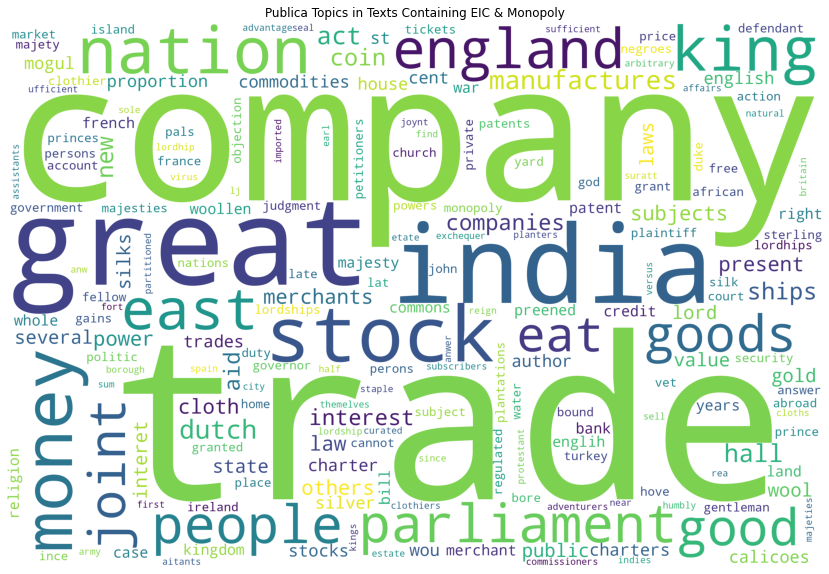

In [53]:
topicCloud('publica','eic_monopoly.txt','Publica Topics in Texts Containing EIC & Monopoly')

[('great', 221), ('trade', 204), ('company', 168), ('king', 133), ('india', 122), ('england', 86), ('stock', 75), ('money', 70), ('good', 67), ('nation', 64), ('east', 57), ('parliament', 49), ('aid', 47), ('hall', 45), ('goods', 44), ('people', 42), ('ships', 40), ('majesty', 40), ('new', 37), ('dutch', 36), ('war', 35), ('act', 34), ('eat', 33), ('english', 33), ('court', 32), ('law', 27), ('house', 27), ('manufactures', 27), ('french', 25), ('kingdom', 25), ('general', 24), ('majety', 24), ('several', 24), ('lord', 24), ('john', 23), ('interest', 23), ('pounds', 22), ('bill', 22), ('companies', 21), ('wool', 21), ('englih', 20), ('persons', 20), ('first', 20), ('silks', 20), ('hundred', 19), ('cent', 19), ('states', 18), ('william', 18), ('subjects', 18), ('land', 17), ('st', 16), ('joint', 16), ('years', 16), ('present', 16), ('others', 15), ('coin', 15), ('france', 15), ('duke', 15), ('ship', 15), ('hove', 15), ('silver', 14), ('power', 14), ('merchants', 14), ('year', 14), ('poor

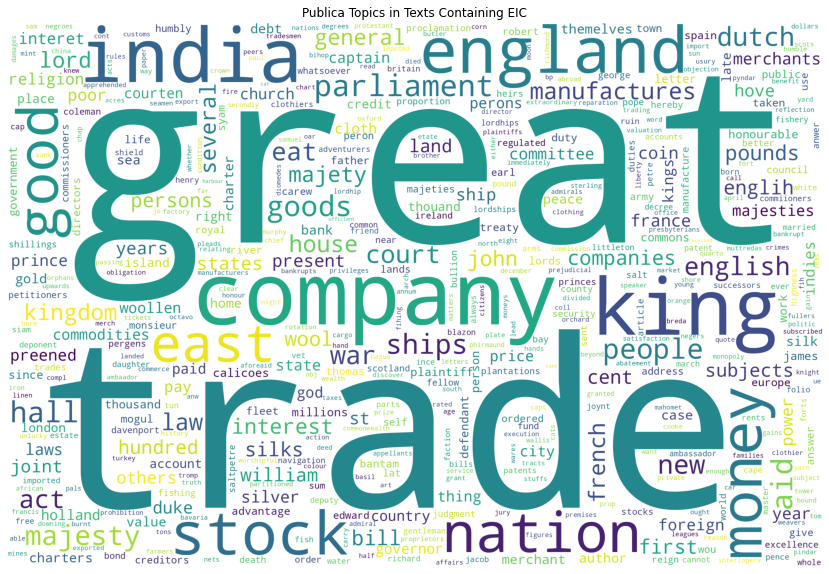

In [57]:
topicCloud('publica','eic.txt','Publica Topics in Texts Containing EIC')

[('great', 12), ('god', 11), ('church', 6), ('good', 6), ('religion', 5), ('lord', 5), ('righteousness', 4), ('world', 4), ('christ', 4), ('place', 4), ('city', 4), ('st', 4), ('christian', 3), ('sin', 3), ('law', 3), ('john', 3), ('life', 3), ('henry', 3), ('robert', 3), ('sect', 2), ('spirits', 2), ('devil', 2), ('chap', 2), ('things', 2), ('book', 2), ('opinion', 2), ('mankind', 2), ('knowledge', 2), ('minister', 2), ('sins', 2), ('hell', 2), ('soul', 2), ('jesus', 2), ('town', 2), ('large', 2), ('river', 2), ('divers', 2), ('first', 2), ('north', 2), ('east', 2), ('south', 2), ('water', 2), ('west', 2), ('leagues', 2), ('fathom', 2), ('lies', 2), ('low', 2), ('half', 2), ('truth', 2), ('self', 2), ('way', 2), ('young', 2), ('richard', 2), ('james', 2), ('george', 2), ('thomas', 2), ('william', 2), ('sam', 2), ('rich', 2), ('several', 2), ('love', 2), ('angels', 1), ('amen', 1), ('hypocrisy', 1), ('holy', 1), ('excellence', 1), ('excellencies', 1), ('lordship', 1), ('letter', 1), ('

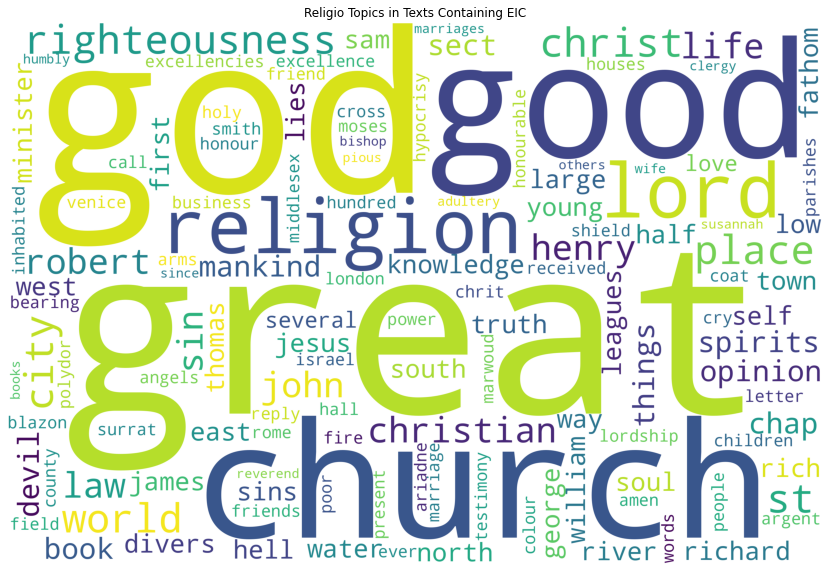

In [58]:
topicCloud('religio','eic.txt','Religio Topics in Texts Containing EIC')

[('love', 9), ('great', 8), ('good', 6), ('world', 5), ('nothing', 5), ('rather', 5), ('self', 5), ('wit', 4), ('cannot', 4), ('give', 4), ('others', 4), ('first', 4), ('hall', 3), ('women', 3), ('things', 3), ('nature', 3), ('thing', 3), ('neither', 3), ('themelves', 2), ('ut', 2), ('nec', 2), ('ad', 2), ('neqe', 2), ('vel', 2), ('pro', 2), ('mi', 2), ('virtue', 2), ('tree', 2), ('fruit', 2), ('water', 2), ('sea', 2), ('trees', 2), ('palme', 2), ('nile', 2), ('ethiopia', 2), ('drink', 2), ('fight', 2), ('roger', 2), ('enter', 2), ('peace', 2), ('humphrey', 2), ('shab', 2), ('favour', 2), ('lover', 2), ('kindness', 2), ('eyes', 2), ('bub', 2), ('ant', 2), ('ruf', 2), ('saline', 2), ('gorge', 2), ('oh', 2), ('whose', 2), ('lucrece', 2), ('javota', 2), ('sex', 1), ('wou', 1), ('ue', 1), ('kind', 1), ('times', 1), ('sum', 1), ('thour', 1), ('latin', 1), ('est', 1), ('cum', 1), ('sed', 1), ('whole', 1), ('face', 1), ('converation', 1), ('name', 1), ('thinks', 1), ('red', 1), ('atrophil', 1

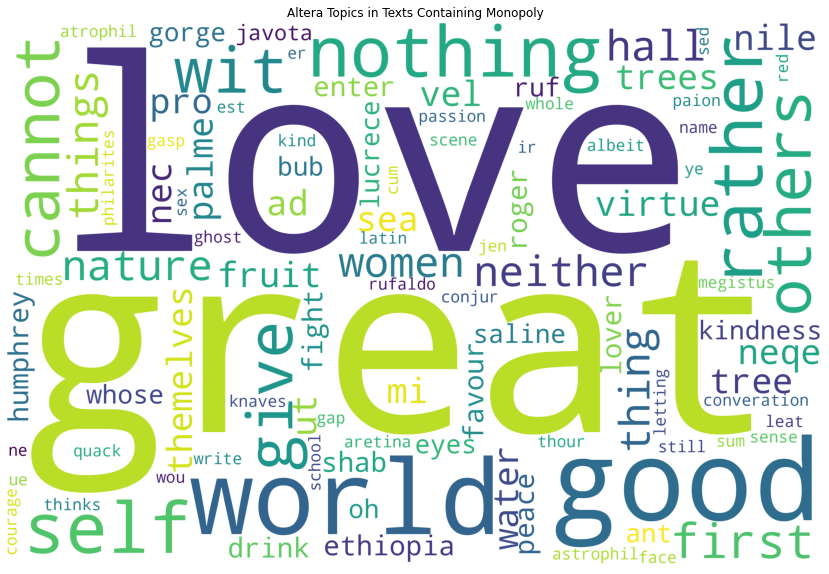

In [54]:
topicCloud('altera','monopoly.txt',"Altera Topics in Texts Containing Monopoly")

[('great', 196), ('king', 187), ('trade', 112), ('people', 95), ('good', 88), ('england', 88), ('parliament', 85), ('company', 72), ('hall', 69), ('law', 67), ('god', 62), ('power', 59), ('money', 47), ('nation', 45), ('india', 43), ('aid', 42), ('laws', 42), ('act', 39), ('government', 37), ('first', 36), ('church', 33), ('lord', 32), ('public', 30), ('stock', 28), ('land', 28), ('kings', 28), ('kingdom', 27), ('house', 25), ('bill', 25), ('religion', 24), ('majesty', 22), ('manufactures', 22), ('others', 21), ('case', 21), ('english', 21), ('court', 20), ('queen', 20), ('things', 18), ('right', 17), ('goods', 17), ('subjects', 17), ('interest', 17), ('city', 17), ('prince', 17), ('state', 16), ('commons', 16), ('new', 16), ('army', 16), ('war', 16), ('plantations', 15), ('french', 15), ('east', 15), ('france', 15), ('london', 14), ('themelves', 14), ('bank', 14), ('country', 14), ('hove', 14), ('statute', 14), ('cloth', 14), ('lords', 14), ('years', 13), ('duke', 13), ('merchants', 1

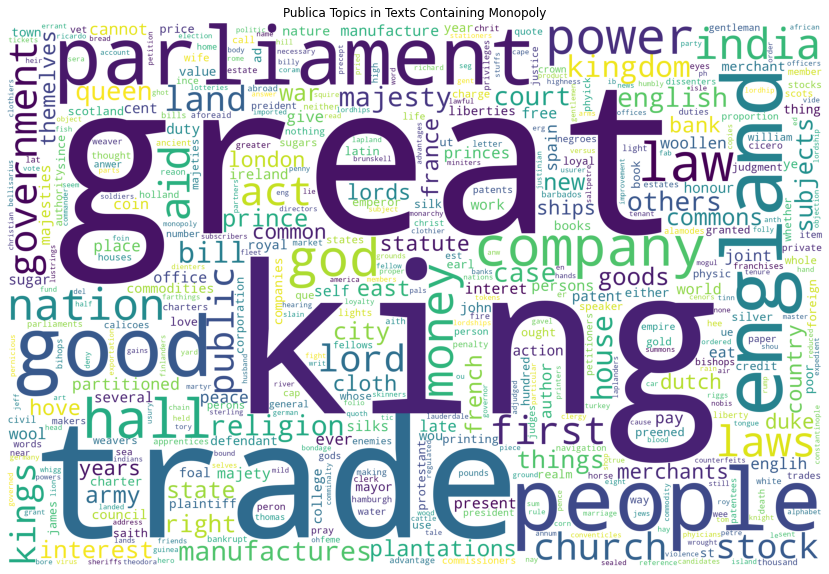

In [55]:
topicCloud('publica','monopoly.txt','Publica Topics in Texts Containing Monopoly')

[('god', 247), ('great', 140), ('good', 126), ('church', 102), ('lord', 81), ('world', 73), ('christ', 68), ('things', 62), ('religion', 59), ('hall', 58), ('holy', 48), ('people', 47), ('first', 45), ('love', 44), ('chrit', 42), ('life', 40), ('faith', 38), ('ever', 36), ('self', 31), ('king', 29), ('spirit', 28), ('heaven', 28), ('pope', 27), ('soul', 26), ('death', 25), ('heart', 24), ('rome', 23), ('true', 22), ('thing', 20), ('gods', 19), ('others', 19), ('ye', 18), ('sin', 17), ('nothing', 16), ('word', 16), ('truth', 16), ('cannot', 15), ('themelves', 15), ('st', 15), ('power', 15), ('grace', 15), ('way', 14), ('law', 14), ('whole', 13), ('bishop', 12), ('saith', 12), ('scripture', 11), ('words', 11), ('er', 10), ('bishops', 10), ('honour', 10), ('divine', 10), ('either', 10), ('state', 10), ('nature', 9), ('jesus', 9), ('sins', 9), ('worship', 9), ('work', 9), ('clergy', 9), ('body', 8), ('blood', 8), ('souls', 8), ('eyes', 8), ('whose', 8), ('oh', 8), ('wine', 7), ('aid', 7), 

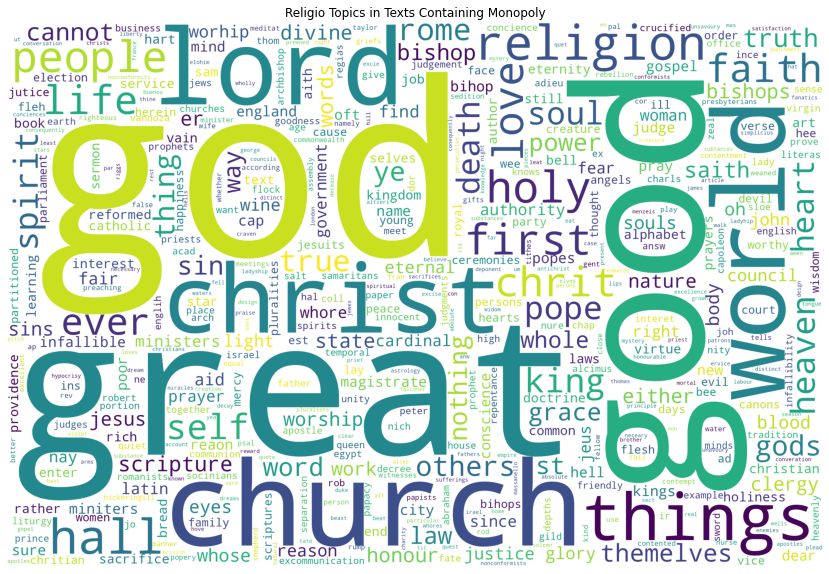

In [56]:
topicCloud('religio','monopoly.txt',"Religio Topics in Texts Containing Monopoly")

In [20]:
def examine(folder,f_name):
    txtFile = directory+'topic model/'+folder+'/'+f_name
    w = open(txtFile,'r')
    words = []
    for line in w.readlines():
        line = line.replace('\n','')
        newlist = line.split(' ')
        words.extend(newlist)

    unique = set()
    unique.update(words)

    m = ' '.join(medica.split('|'))
    r = ' '.join(religio.split('|'))
    p = ' '.join(publica.split('|'))
    a = []
    for word in unique:
        if (re.search(word,p)==None) and (re.search(word,r)==None) and (re.search(word,m)==None):
            a.append(word)
    w.close()
    print(a)

In [ ]:
examine('publica','eic.txt')

In [65]:
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topic distributions within all the texts of a particular category (publica, religio, altera, or medica)
readFile = pd.read_csv('/home/rapiduser/Materials/topic model/religio/monopoly.csv')
data = readFile.text.values.tolist()
data = remove_stopwords(data)

id2word = corpora.Dictionary(data)
corpus = [id2word.doc2bow(text) for text in data]
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared, '/home/rapiduser/Materials/results/religio_monopoly.html')
LDAvis_prepared


/home/rapiduser/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.005121  0.000539       1        1  18.894447
9      0.000793  0.001104       2        1  11.855209
5     -0.002670 -0.000162       3        1  11.103933
4      0.000248  0.003893       4        1  10.622480
0      0.003329 -0.001372       5        1  10.108891
8     -0.001338 -0.001113       6        1   9.818455
6     -0.002020 -0.003198       7        1   9.161869
7      0.001963  0.001277       8        1   8.224241
3      0.003470 -0.001930       9        1   5.333674
2      0.001346  0.000961      10        1   4.876801, topic_info=        Term           Freq          Total Category  logprob  loglift
150   church   38894.000000   38894.000000  Default  30.0000  30.0000
392      god  110032.000000  110032.000000  Default  29.0000  29.0000
557     lord   31076.000000   31076.000000  Default  28.0000  28.0000
394     good   31984.000000   31984.000000  Default  27.0000  27.0000
438     holy   19385.000000   19385.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
906    thing     743.471506   16361.632880  Topic10  -6.2095  -0.0707
928    truth     652.152884   13382.602774  Topic10  -6.3405  -0.0008
2868    love     752.338394   18102.356525  Topic10  -6.1976  -0.1599
341    faith     731.305185   20076.734615  Topic10  -6.2260  -0.2918
226    death     624.796658   12888.608834  Topic10  -6.3834  -0.0060

[1003 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
40736      1  0.119788  abassines
40736      2  0.119788  abassines
40736      3  0.089841  abassines
40736      4  0.194656  abassines
40736      5  0.119788  abassines
...      ...       ...        ...
1003       6  0.112016      years
1003       7  0.093641      years
1003       8  0.099374      years
1003       9  0.037339      years
1003      10  0.032341      years

[4836 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 6, 5, 1, 9, 7, 8, 4, 3])

SyntaxError: invalid syntax (1112973988.py, line 1)